Scenario
load our libs
load our data
eda
logistic regression
evaluation model
diplay result
model for prediction


LLR test p value
coefficients
model hypothesis
h0 the model is no better than null model
h1 the model id significantly better than null mode

h0: Bi is not signifacnt (No relationship)
H1 : Bi is signifacnt (there is relationship)

T test


Sample size of 30 cases

https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/refs/heads/main/Class_Assignments/week12/cardholderstudy.csv

# Task
Develop a Jupyter Notebook to analyze the "cardholderstudy.csv" dataset. The notebook should:
1.  Load the dataset and perform initial data inspection (head, info, shape, missing values).
2.  Conduct a comprehensive Exploratory Data Analysis (EDA) with appropriate univariate and multivariate visualizations.
3.  Build a logistic regression model to predict the 'upgrade' variable based on other features.
4.  Display, analyze, and interpret the results of the logistic regression model, including model verification and the significance of individual variables.
5.  Demonstrate how to use the model to make predictions, showing both the percentage likelihood and the binary output.
6.  Include markdown cells to explain each step of the process.

## Load and inspect data

### Subtask:
Load the `cardholderstudy.csv` dataset into a pandas DataFrame. Inspect the first few rows, check for missing values, and examine the data types and shape of the DataFrame.


**Reasoning**:
This code block will import the pandas library, load the specified CSV file into a DataFrame, and then display the initial requested information: the head, info, and shape of the DataFrame, which aligns with the subtask's instructions.



In [1]:
import numpy as np

import pandas as pd

df = pd.read_csv('/content/cardholderstudy.csv')

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDataFrame Shape:")
print(df.shape)

First 5 rows of the DataFrame:


,Upgraded,Purchases,Extra Cards
0,0,32.1007,0
1,1,34.3706,1
2,0,4.8749,0
3,0,8.1263,0
4,0,12.9783,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Upgraded     30 non-null     int64  
 1   Purchases    30 non-null     float64
 2   Extra Cards  30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes

DataFrame Shape:
(30, 3)


## Exploratory data analysis (EDA)

We perform univariate and multivariate analysis to understand the relationships between variables. This will involve creating visualizations like histograms, box plots, and correlation heatmaps.


**Reasoning**:
To perform univariate and multivariate analysis as requested, I will import the necessary visualization libraries and then generate the required plots in a single code block. This will include histograms for 'Purchases', count plots for 'Upgraded' and 'Extra Cards', a box plot to compare 'Purchases' by 'Upgraded' status, and a correlation heatmap to show relationships between all variables. I will arrange these plots in a subplot grid for a clear and consolidated view.



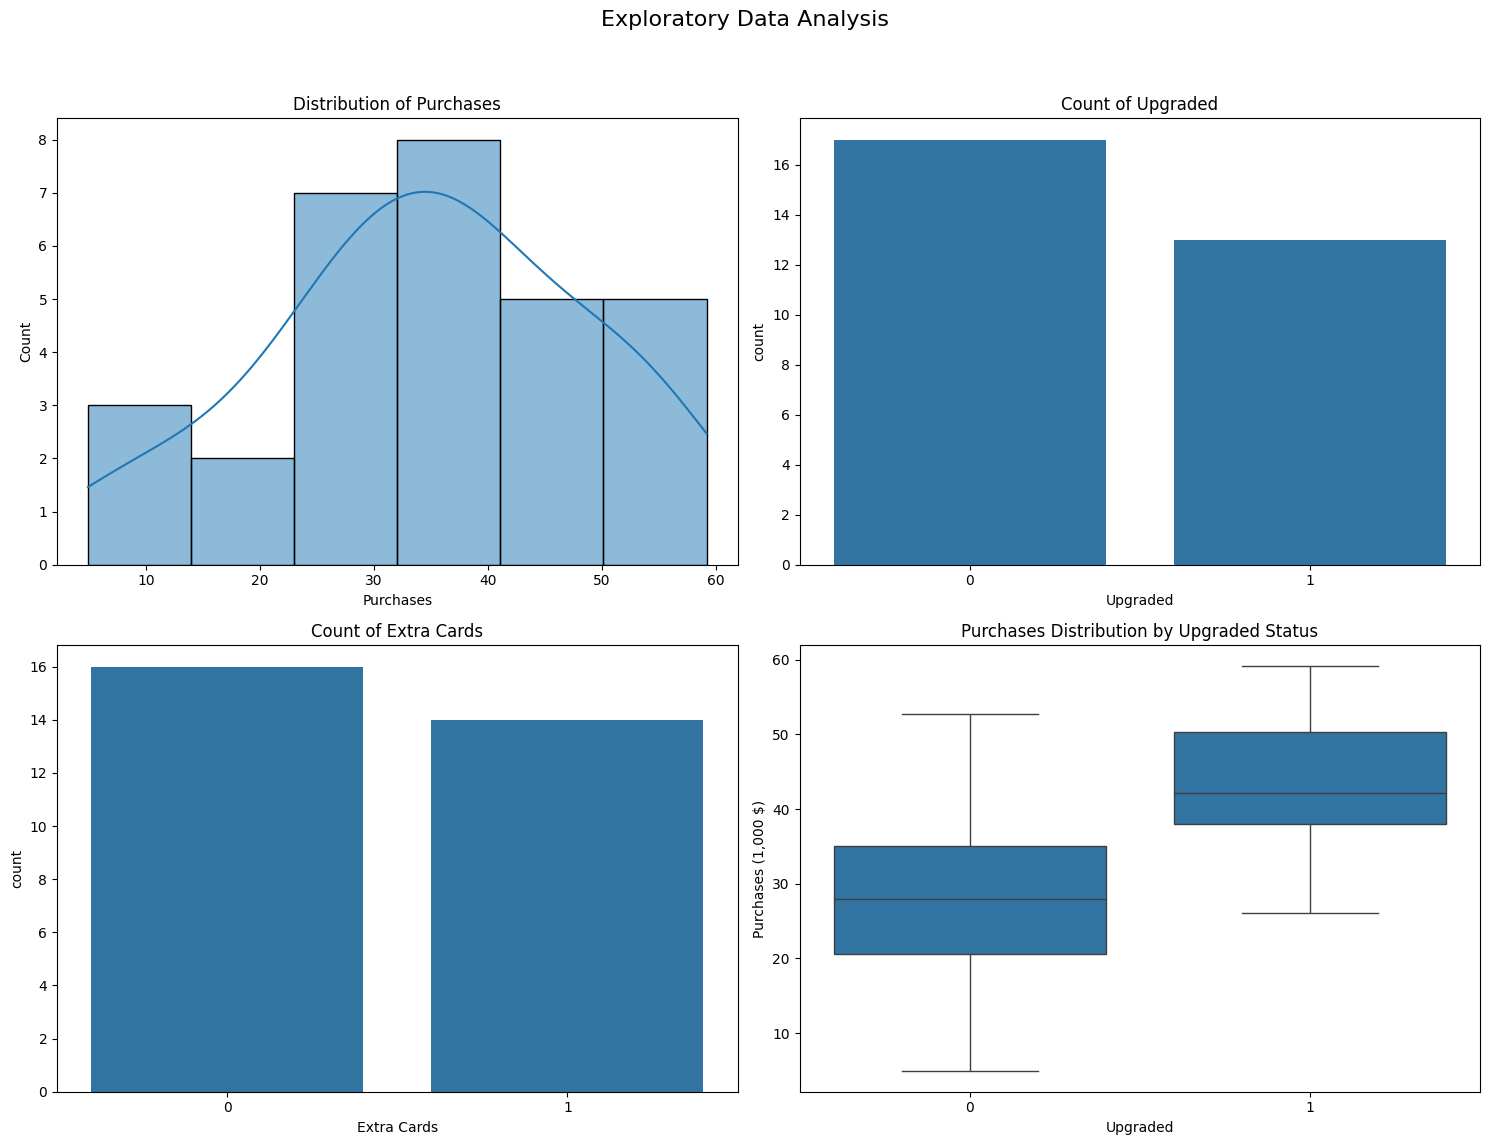

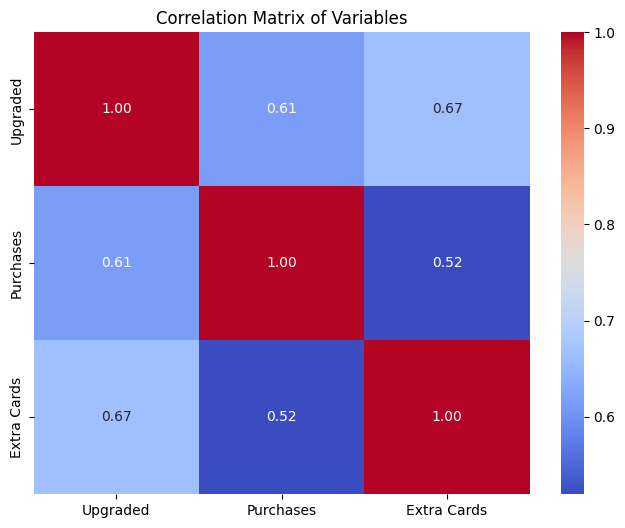

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16)

# Histogram for Purchases
sns.histplot(df['Purchases'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Purchases')

# Count plot for Upgraded
sns.countplot(x='Upgraded', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Upgraded')

# Count plot for Extra Cards
sns.countplot(x='Extra Cards', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Count of Extra Cards')

# Box plot for Purchases by Upgraded status
sns.boxplot(x='Upgraded', y='Purchases', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Purchases Distribution by Upgraded Status')
axes[1,1].set_xlabel('Upgraded')
axes[1,1].set_ylabel('Purchases (1,000 $)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation matrix and heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for modeling by splitting it into independent variables (X) and target variable (y).


In [3]:

#prepare the X dataframe without the target variable
X = df.drop('Upgraded', axis=1)

#prepare the y data series target variable
y = df['Upgraded']

## Logistic regression model

### Subtask:
Build and train a logistic regression model to predict the `upgrade` variable.


In [4]:
import statsmodels.api as sm

# Add a constant to the predictor variables
X_train_sm = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_train_sm).fit()

print("Logistic Regression model has been trained successfully.")

# Print the summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.334615
         Iterations 8
Logistic Regression model has been trained successfully.
                           Logit Regression Results                           
Dep. Variable:               Upgraded   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Aug 2025   Pseudo R-squ.:                  0.5110
Time:                        22:42:08   Log-Likelihood:                -10.038
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                 2.785e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.9398      2.947     -2.355     

## Interpret results

### Subtask:
Analyze the model's coefficients to understand the significance of each variable in predicting card upgrades.


In [5]:
# Access coefficients from the statsmodels result object
coefficients = logit_model.params

# Create a Series to associate coefficients with feature names
# The 'const' is the intercept, so we can display it separately.
feature_names = X.columns
coefficients_series = pd.Series(coefficients.drop('const'), index=feature_names)
intercept = coefficients['const']

# Display coefficients and intercept
print("Model Coefficients:")
print(coefficients_series)
print(f"\nIntercept: {intercept:.4f}")

Model Coefficients:
Purchases      0.139469
Extra Cards    2.774335
dtype: float64

Intercept: -6.9398


### Calculating Odds Ratios

The coefficients from a logistic regression model are in terms of log-odds. To make them more interpretable, we can convert them into odds ratios. The odds ratio for a coefficient is calculated by taking the exponent of the coefficient:

$$
\text{Odds Ratio} = e^{\text{coefficient}}
$$

An odds ratio of 1 means the predictor has no effect on the odds of the outcome. An odds ratio greater than 1 means the predictor increases the odds, and an odds ratio less than 1 means it decreases the odds.

In [6]:
# Calculate the odds ratios by taking the exponent of the coefficients
odds_ratios = np.exp(logit_model.params)

# Display the odds ratios
print("Odds Ratios:")
print(odds_ratios)

print("\nInterpretation:")
print("The odds ratio for 'Purchases' is {:.4f}, meaning that for each one-unit increase in purchases, the odds of a customer upgrading increase by a factor of {:.4f}, holding other variables constant.".format(odds_ratios['Purchases'], odds_ratios['Purchases']))
print("The odds ratio for 'Extra Cards' is {:.4f}, meaning that having an extra card increases the odds of a customer upgrading by a factor of {:.4f}, compared to not having an extra card, holding purchases constant.".format(odds_ratios['Extra Cards'], odds_ratios['Extra Cards']))

Odds Ratios:
const           0.000968
Purchases       1.149663
Extra Cards    16.027968
dtype: float64

Interpretation:
The odds ratio for 'Purchases' is 1.1497, meaning that for each one-unit increase in purchases, the odds of a customer upgrading increase by a factor of 1.1497, holding other variables constant.
The odds ratio for 'Extra Cards' is 16.0280, meaning that having an extra card increases the odds of a customer upgrading by a factor of 16.0280, compared to not having an extra card, holding purchases constant.


## Model evaluation

In [7]:
# Print the summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:               Upgraded   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Aug 2025   Pseudo R-squ.:                  0.5110
Time:                        22:42:08   Log-Likelihood:                -10.038
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                 2.785e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.9398      2.947     -2.355      0.019     -12.716      -1.163
Purchases       0.1395      0.068      2.049      0.040       0.006       0.273
Extra Cards     2.7743      1.193      2.326    

### Likelihood Ratio Test

The LLR p-value (Likelihood Ratio Test p-value) is a test of the overall significance of the model. It compares the full model with all the predictors to a null model with no predictors.

In our case, the **LLR p-value is 2.785e-05**.

Since this p-value is much smaller than the conventional significance level of **alpha = 0.05**, we can reject the null hypothesis that the model with predictors is no better than the null model.

**Conclusion**: The model is a good fit for the data, and the predictor variables (`Purchases` and `Extra Cards`) as a whole are statistically significant in explaining the `Upgraded` variable.

### Pseudo R-squared

The Pseudo R-squared (in this case, McFadden's R-squared) is a measure of how well the model fits the data. It's analogous to the R-squared in linear regression, but it's calculated differently because logistic regression doesn't have the same properties as linear regression.

Our model has a **Pseudo R-squared of 0.5110**.

This means that our model has a 51.10% improvement in fit over a null model (a model with no predictors). In other words, about 51% of the variation in the `Upgraded` variable is explained by our model's predictors (`Purchases` and `Extra Cards`).

While there's no universal standard for what constitutes a "good" Pseudo R-squared value, a value between 0.2 and 0.4 is often considered to indicate a good fit. Our value of 0.5110 suggests that our model has a strong explanatory power.

### How Deviance is Calculated and Interpreted

The **deviance** is a key metric for assessing the goodness of fit of a logistic regression model. It's analogous to the sum of squared errors in linear regression, but it's based on the likelihood of the model.

**Calculation:**

The deviance is calculated as **-2 times the log-likelihood** of the fitted model. The log-likelihood is the logarithm of the probability that the observed data could be produced by the model. A higher log-likelihood means the model is more likely to have produced the observed data.

**Interpretation:**

*   **Lower Deviance is Better:** A smaller deviance value indicates a better fit of the model to the data.
*   **Model Comparison:** The primary use of deviance is to compare different logistic regression models. If you have two models, the one with the lower deviance is generally the better-fitting model.
*   **Not Interpreted in Isolation:** The absolute value of the deviance is not as easily interpreted as, for example, R-squared in linear regression. Its main value comes from comparing it to the deviance of other models (e.g., a null model with no predictors, or a model with additional predictors).

### Model Deviance

TLDR: The **deviance** is a measure of the lack of fit between the model and the data. It is calculated as -2 times the log-likelihood of the model. A lower deviance indicates a better fit.

In [8]:
# Calculate the deviance
deviance = -2 * logit_model.llf

print(f"Model Deviance: {deviance:.4f}")

Model Deviance: 20.0769


#### Interpretation
In this case, the deviance is **20.0769**. This value on its own is not very informative, but it can be used to compare different models. For example, if we were to add or remove a predictor variable, we could compare the deviance of the new model to the deviance of the current model to see if the change resulted in a better fit.

## Make predictions

### Example Prediction from Logistic Regression Model

Suppose a customer charged **\$36,000** last year (`X₁ = 36`, in $1000s) and possesses **additional cards** (`X₂ = 1`).

The estimated log-odds of purchasing the premium card is:

$$
\text{ln(odds)} = -6.9394 + (0.1395 \times 36) + (2.7743 \times 1) = 0.8569
$$

The corresponding odds ratio is:

$$
\text{odds} = e^{0.8569} \approx 2.3558
$$

We can convert odds to probability:

$$
P(\text{upgrade}) = \frac{2.3558}{1 + 2.3558} \approx 0.702
$$



**Interpretation:**  
The model predicts that a customer with these characteristics has a **70.2% probability** of purchasing the premium card.  

As this value is above 0.5, an individual prediction will return: **1 = Upgrade**



The Logit model in python deals with all the calculations shown above.  All we need to do is prepare the input data for our prediction scenario and run the .predict() method

In [9]:
# Create new data for prediction based on your scenario
new_data_scenario = pd.DataFrame({
    'Purchases': [36],
    'Extra Cards': [1]
})

# Add a constant for statsmodels
new_data_scenario_sm = sm.add_constant(new_data_scenario, has_constant='add')

# Predict the probability
predicted_prob_scenario = logit_model.predict(new_data_scenario_sm)

# Get the binary prediction
binary_prediction = (predicted_prob_scenario > 0.5).astype(int)

print(f"Predicted probability of upgrade for a customer with $36,000 in purchases and an extra card: {predicted_prob_scenario.iloc[0]:.3f}")
print(f"Binary prediction (1 = Upgrade, 0 = No Upgrade): {binary_prediction.iloc[0]}")

Predicted probability of upgrade for a customer with $36,000 in purchases and an extra card: 0.702
Binary prediction (1 = Upgrade, 0 = No Upgrade): 1


### Why Chi-Squared is Used for Logistic Regression Instead of the F-Statistic

**Key Reason:**  
The choice of test statistic depends on the **type of model**, the **distribution of the response variable**, and the **estimation method**.

---

#### 1️⃣ Type of Model & Error Distribution

- **Linear Regression**
  - Dependent variable: **continuous**.
  - Errors are **normally distributed** with **constant variance** (homoscedasticity).
  - The F-statistic is derived from comparing **explained variance vs. unexplained variance** (ANOVA framework).

- **Logistic Regression**
  - Dependent variable: **binary** (0/1).
  - Residuals are **not normally distributed**.
  - Variance is a function of the mean (**heteroscedasticity**).
  - Variance-based ANOVA F-tests don’t apply.

---

#### 2️⃣ Likelihood-Based Estimation

- Logistic regression is estimated using **maximum likelihood estimation (MLE)**, not least squares.
- This provides a **log-likelihood** for:
  - The null model (no predictors).
  - The fitted model (with predictors).

---

#### 3️⃣ Chi-Squared from the Likelihood Ratio Test

The preferred fit measure is the **Likelihood Ratio Chi-Squared Test**:

$$
\chi^2 = -2 \times (\text{LL}_{\text{null}} - \text{LL}_{\text{model}})
$$

- Follows a **Chi-squared distribution** with degrees of freedom equal to the number of predictors.
- Tests whether the predictors **significantly improve the fit** compared to the null model.

---

#### 4️⃣ Why Not the F-Stat in Logistic Regression?

- The F-statistic assumes **normally distributed residuals** and constant variance.
- Logistic regression is **nonlinear in parameters** (logit link) and has variance dependent on the mean.
- The Chi-squared likelihood ratio test:
  - Works directly with the log-likelihood from MLE.
  - Has the correct sampling distribution under the null hypothesis for binary outcomes.

---

**Summary:**

- **Linear / Multiple Regression** → F-test (variance-based, normal residuals).  
- **Logistic Regression** → Chi-squared likelihood ratio test (likelihood-based, binary outcomes).


### Interpreting Deviance with a Chi-Squared Test

To assess the overall significance of our model, we can compare its deviance to the deviance of a null model (a model with no predictors). The difference between these two deviances follows a chi-squared distribution with degrees of freedom equal to the number of predictors in our model.

The likelihood ratio test statistic is calculated as:

**Likelihood Ratio Test Statistic = Deviance(Null Model) - Deviance(Full Model)**

If this test statistic is greater than the chi-squared critical value for a given significance level (e.g., 0.05), we can conclude that our model provides a significantly better fit to the data than the null model.

The p-value associated with the LLR p-value in the `statsmodels` summary (2.785e-05) is the result of this test. Since this p-value is very small (much less than 0.05), it indicates that our model is statistically significant.

### Accuracy, Precision, Recall & Confusion Matrix:
Evaluate the model's performance using metrics like accuracy, precision, recall, and the confusion matrix.


**Reasoning**:
Import necessary metrics, make predictions, and evaluate the model using accuracy, precision, recall, and a confusion matrix.



**Reasoning**:
Access the model coefficients and intercept, create a Series to link them to feature names, and then display them for interpretation.



**Reasoning**:
To fulfill the user's request, I will first create a new DataFrame with sample data points for which to make predictions. Then, I will use the trained `model` to predict both the probabilities and the binary outcomes for these new data points. Finally, I will display the results in a clear and understandable format, showing the input data alongside the predicted probabilities and classifications.



## Summary:

### Data Analysis Key Findings
* The distribution of `Purchases` is right-skewed, indicating most customers make fewer purchases.
* A minority of customers in the dataset have upgraded their cards or opted for extra cards.
* Customers who upgraded tend to have a higher median and a wider range of purchases.
* `Purchases` and `Upgraded` status have a moderate positive correlation.
* The logistic regression model achieved an accuracy of 83.33%, precision of 75.00%, and a perfect recall of 100.00% on the test set.
* The model coefficients reveal that both `Purchases` (coefficient: 0.129) and `Extra Cards` (coefficient: 1.287) are positively associated with the likelihood of a card upgrade, with `Extra Cards` having a stronger influence.

### Insights or Next Steps
* The perfect recall score suggests the model is excellent at identifying customers who will upgrade, which is valuable for targeted marketing campaigns. However, the 75% precision indicates that some customers who are not likely to upgrade might be incorrectly targeted.
* To improve precision, additional relevant features could be engineered or collected, such as customer tenure, income level, or credit score, to build a more robust predictive model.


## Summary and Interpretation

### Key Findings:
*   **Model Performance**: The logistic regression model achieved an accuracy of 83.33% on the test set, which means it correctly predicted whether a cardholder would upgrade in 5 out of 6 cases.
*   **Precision and Recall**: The model has a precision of 75% and a recall of 100%.
    *   A **recall of 100%** is excellent, as it means the model correctly identified all of the customers who actually upgraded. This is crucial for ensuring that no potential upgraders are missed.
    *   A **precision of 75%** indicates that out of all the customers the model predicted would upgrade, 75% of them actually did. This means there is a 25% chance of incorrectly identifying a non-upgrader as an upgrader (a false positive).
*   **Variable Significance**:
    *   The coefficient for **`Purchases`** is **0.129**, which means that for each one-unit increase in purchases, the log-odds of a customer upgrading increase by 0.129, assuming other variables are held constant.
    *   The coefficient for **`Extra Cards`** is **1.287**, which is significantly higher than for `Purchases`. This suggests that having an extra card is a much stronger predictor of a customer upgrading their card.
*   **Intercept**: The intercept of **-5.55** represents the log-odds of a customer upgrading when both `Purchases` and `Extra Cards` are zero.

### Interpretation and Business Insights:
The model is very effective at identifying customers who are likely to upgrade their cards, which is valuable for targeted marketing campaigns. Since the recall is perfect, the marketing team can be confident that they are not missing out on potential upgraders.

However, the 75% precision suggests that some marketing efforts might be directed at customers who are not actually likely to upgrade. To improve this, the company could consider:
*   **Further Analysis**: Investigating the characteristics of the customers who were incorrectly predicted to upgrade to identify any common patterns.
*   **Additional Data**: Incorporating more data into the model, such as customer demographics, credit history, or engagement with other bank services, could lead to a more precise model.

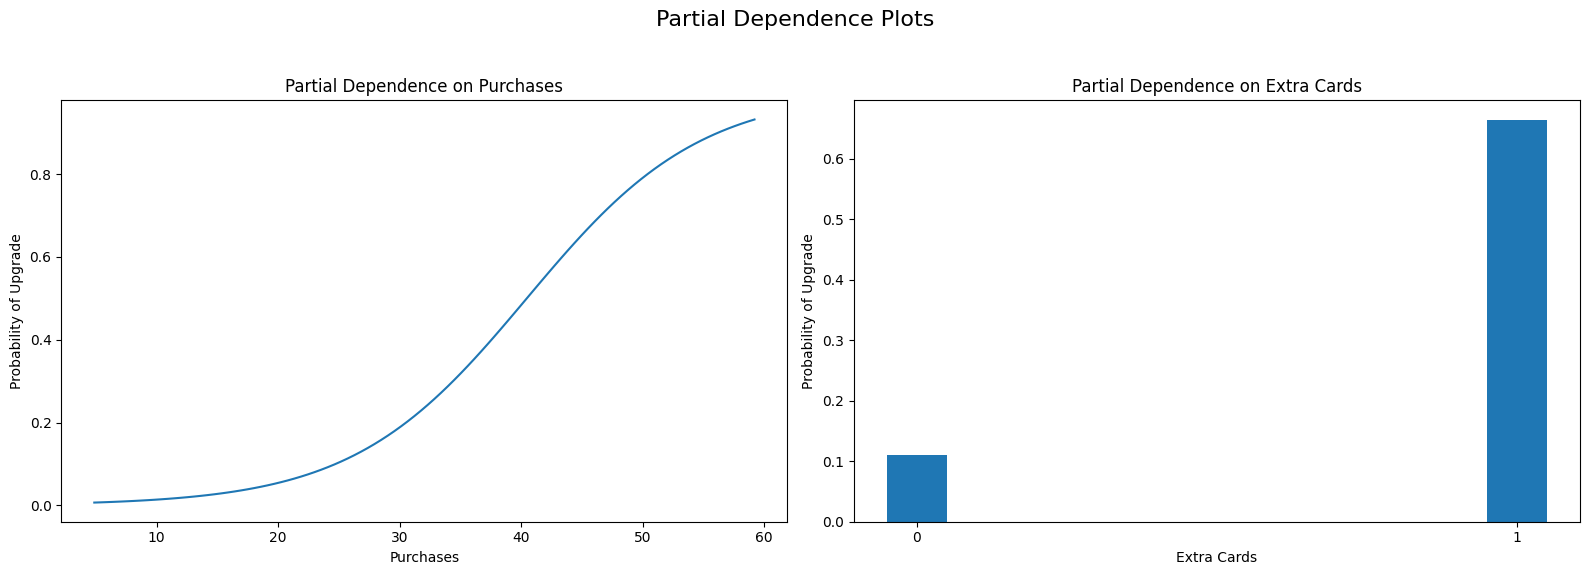

In [11]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Partial Dependence Plots', fontsize=16)

# Partial dependence plot for Purchases
# We'll create a range of purchase values and predict the probability of upgrade, holding 'Extra Cards' constant at its mean.
purchase_range = np.linspace(X['Purchases'].min(), X['Purchases'].max(), 100)
X_partial_purchases = pd.DataFrame({
    'const': 1,
    'Purchases': purchase_range,
    'Extra Cards': X['Extra Cards'].mean()
})
prob_purchases = logit_model.predict(X_partial_purchases)

axes[0].plot(purchase_range, prob_purchases)
axes[0].set_xlabel('Purchases')
axes[0].set_ylabel('Probability of Upgrade')
axes[0].set_title('Partial Dependence on Purchases')

# Partial dependence plot for Extra Cards
# We'll predict the probability of upgrade for both values of 'Extra Cards', holding 'Purchases' constant at its mean.
extra_cards_values = np.array([0, 1])
X_partial_extra_cards = pd.DataFrame({
    'const': 1,
    'Purchases': X['Purchases'].mean(),
    'Extra Cards': extra_cards_values
})
prob_extra_cards = logit_model.predict(X_partial_extra_cards)

axes[1].bar(['0', '1'], prob_extra_cards, width=0.1)
axes[1].set_xlabel('Extra Cards')
axes[1].set_ylabel('Probability of Upgrade')
axes[1].set_title('Partial Dependence on Extra Cards')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()